In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

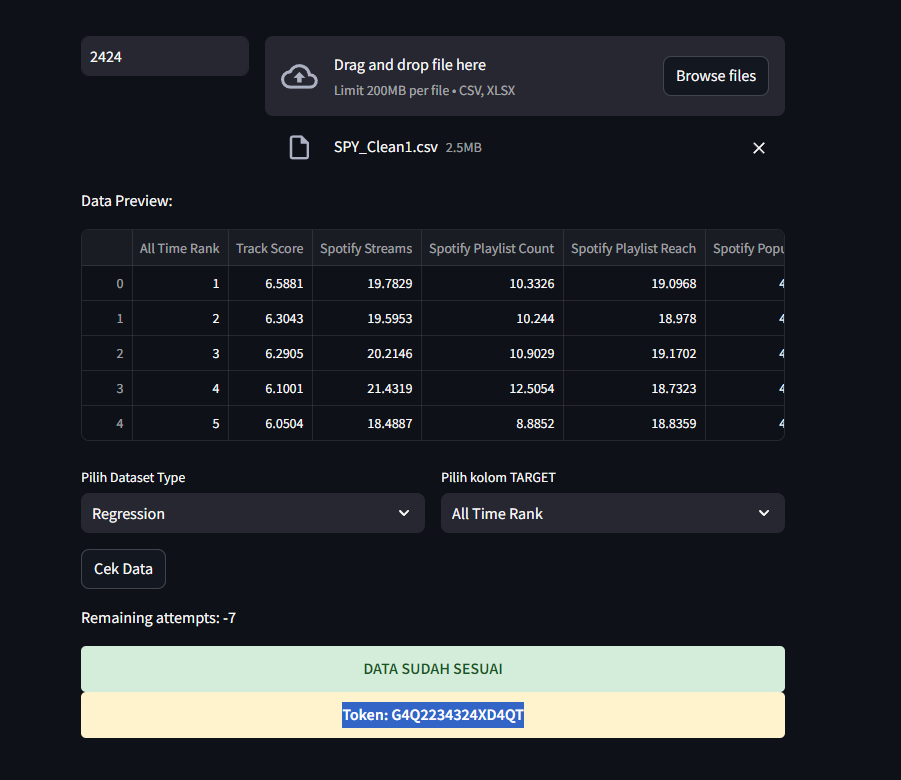

In [2]:
df = pd.read_csv('/content/SPY.csv')

In [3]:
df.head()

Unnamed: 0                       Track                    Album Name  \
0           0         MILLION DOLLAR BABY  Million Dollar Baby - Single   
1           1                 Not Like Us                   Not Like Us   
2           2  i like the way you kiss me    I like the way you kiss me   
3           3                     Flowers              Flowers - Single   
4           4                     Houdini                       Houdini   

           Artist Release Date          ISRC All Time Rank Track Score  \
0   Tommy Richman    4/26/2024  QM24S2402528             1       725.4   
1  Kendrick Lamar     5/4/2024  USUG12400910             2       545.9   
2         Artemas    3/19/2024  QZJ842400387             3       538.4   
3     Miley Cyrus    1/12/2023  USSM12209777             4       444.9   
4          Eminem    5/31/2024  USUG12403398             5       423.3   

  Spotify Streams Spotify Playlist Count  ... SiriusXM Spins  \
0     390,470,936                 30,716  ...            684   
1     323,703,884                 28,113  ...              3   
2     601,309,283                 54,331  ...            536   
3   2,031,280,633                269,802  ...          2,182   
4     107,034,922                  7,223  ...              1   

  Deezer Playlist Count Deezer Playlist Reach Amazon Playlist Count  \
0                  62.0            17,598,718                 114.0   
1                  67.0            10,422,430                 111.0   
2                 136.0            36,321,847                 172.0   
3                 264.0            24,684,248                 210.0   
4                   NaN            17,660,624                 105.0   

  Pandora Streams Pandora Track Stations Soundcloud Streams Shazam Counts  \
0      18,004,655                 22,931          4,818,457     2,669,262   
1       7,780,028                 28,444          6,623,075     1,118,279   
2       5,022,621                  5,639          7,208,651     5,285,340   
3     190,260,277                203,384                NaN    11,822,942   
4       4,493,884                  7,006            207,179       457,017   

  TIDAL Popularity Explicit Track  
0                -            0.0  
1              NaN            1.0  
2              NaN            0.0  
3              NaN            0.0  
4              NaN            1.0  

[5 rows x 30 columns]

In [4]:
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  6873 non-null   int64  
 1   Track                       6873 non-null   object 
 2   Album Name                  6873 non-null   object 
 3   Artist                      6870 non-null   object 
 4   Release Date                6873 non-null   object 
 5   ISRC                        6873 non-null   object 
 6   All Time Rank               6873 non-null   object 
 7   Track Score                 6089 non-null   object 
 8   Spotify Streams             6781 non-null   object 
 9   Spotify Playlist Count      6817 non-null   object 
 10  Spotify Playlist Reach      6808 non-null   object 
 11  Spotify Popularity          5501 non-null   object 
 12  YouTube Views               6602 non-null   object 
 13  YouTube Likes               6590 

In [6]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'Unnamed: 0':
[   0    1    2 ... 6870 6871 6872]

Nilai unik pada kolom 'Track':
['MILLION DOLLAR BABY' 'Not Like Us' 'i like the way you kiss me' ...
 'Grace (feat. 42 Dugg)' 'Nashe Si Chadh Gayi'
 'Me Acostumbre (feat. Bad Bunny)']

Nilai unik pada kolom 'Album Name':
['Million Dollar Baby - Single' 'Not Like Us' 'I like the way you kiss me'
 ... 'Dil Meri Na Sune (From "Genius")' 'November Top 10 Songs'
 'Me Acostumbre (feat. Bad Bunny)']

Nilai unik pada kolom 'Artist':
['Tommy Richman' 'Kendrick Lamar' 'Artemas' ... 'Kerim Araz'
 'Jaques Raupï¿' 'BUSHIDO ZHO']

Nilai unik pada kolom 'Release Date':
['4/26/2024' '5/4/2024' '3/19/2024' ... '10/31/2018' '11/8/2016'
 '4/11/2017']

Nilai unik pada kolom 'ISRC':
['QM24S2402528' 'USUG12400910' 'QZJ842400387' ... 'USUG12000043'
 'INY091600067' 'USB271700107']

Nilai unik pada kolom 'All Time Rank':
['1' '2' '3' ... '4,571' '4,591' '4,593']

Nilai unik pada kolom 'Track Score':
['725.4' '545.9' '538.4' ... '19.501273

In [7]:
''' # Nilai-nilai yang ingin dihapus
nilai_yang_dihapus = ['-', 'inf', '-inf']

# Hapus baris yang memiliki nilai-nilai tersebut pada kolom mana pun
df = df[~df.isin(nilai_yang_dihapus).any(axis=1)]

df.info()'''

" # Nilai-nilai yang ingin dihapus\nnilai_yang_dihapus = ['-', 'inf', '-inf']\n\n# Hapus baris yang memiliki nilai-nilai tersebut pada kolom mana pun\ndf = df[~df.isin(nilai_yang_dihapus).any(axis=1)]\n\ndf.info()"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  6873 non-null   int64  
 1   Track                       6873 non-null   object 
 2   Album Name                  6873 non-null   object 
 3   Artist                      6870 non-null   object 
 4   Release Date                6873 non-null   object 
 5   ISRC                        6873 non-null   object 
 6   All Time Rank               6873 non-null   object 
 7   Track Score                 6089 non-null   object 
 8   Spotify Streams             6781 non-null   object 
 9   Spotify Playlist Count      6817 non-null   object 
 10  Spotify Playlist Reach      6808 non-null   object 
 11  Spotify Popularity          5501 non-null   object 
 12  YouTube Views               6602 non-null   object 
 13  YouTube Likes               6590 

In [9]:
# dapat bocoran bahwa jumlah anomali 2863

In [10]:
df['TIDAL Popularity'].value_counts()

TIDAL Popularity
-       968
inf     962
-inf    939
Name: count, dtype: int64

In [11]:
df['Soundcloud Streams'].value_counts()

Soundcloud Streams
inf           726
-inf          721
-             672
7,058,460       5
87,762,940      5
             ... 
579,551         1
71,735,622      1
317,508         1
2,791,732       1
1,285,921       1
Name: count, Length: 1268, dtype: int64

In [12]:
df['Soundcloud Streams'].isnull().sum()

2894

In [13]:
df.head(9)

Unnamed: 0                       Track  \
0           0         MILLION DOLLAR BABY   
1           1                 Not Like Us   
2           2  i like the way you kiss me   
3           3                     Flowers   
4           4                     Houdini   
5           5                 Lovin On Me   
6           6            Beautiful Things   
7           7                   Gata Only   
8           8        Danza Kuduro - Cover   

                                     Album Name          Artist Release Date  \
0                  Million Dollar Baby - Single   Tommy Richman    4/26/2024   
1                                   Not Like Us  Kendrick Lamar     5/4/2024   
2                    I like the way you kiss me         Artemas    3/19/2024   
3                              Flowers - Single     Miley Cyrus    1/12/2023   
4                                       Houdini          Eminem    5/31/2024   
5                                   Lovin On Me     Jack Harlow   11/10/2023   
6                              Beautiful Things    Benson Boone    1/18/2024   
7                                     Gata Only      FloyyMenor     2/2/2024   
8  ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -   MUSIC LAB JPN     6/9/2024   

           ISRC All Time Rank Track Score Spotify Streams  \
0  QM24S2402528             1       725.4     390,470,936   
1  USUG12400910             2       545.9     323,703,884   
2  QZJ842400387             3       538.4     601,309,283   
3  USSM12209777             4       444.9   2,031,280,633   
4  USUG12403398             5       423.3     107,034,922   
5  USAT22311371             6       410.1     670,665,438   
6  USWB12307016             7       407.2     900,158,751   
7  QZL382406049             8       375.8     675,079,153   
8  TCJPA2463708             9       355.7   1,653,018,119   

  Spotify Playlist Count  ... SiriusXM Spins Deezer Playlist Count  \
0                 30,716  ...            684                  62.0   
1                 28,113  ...              3                  67.0   
2                 54,331  ...            536                 136.0   
3                269,802  ...          2,182                 264.0   
4                  7,223  ...              1                   NaN   
5                105,892  ...          4,654                  86.0   
6                 73,118  ...            429                 168.0   
7                 40,094  ...             30                  87.0   
8                      1  ...            NaN                   NaN   

  Deezer Playlist Reach Amazon Playlist Count Pandora Streams  \
0            17,598,718                 114.0      18,004,655   
1            10,422,430                 111.0       7,780,028   
2            36,321,847                 172.0       5,022,621   
3            24,684,248                 210.0     190,260,277   
4            17,660,624                 105.0       4,493,884   
5            17,167,254                     -     138,529,362   
6            48,197,850                   inf      65,447,476   
7            33,245,595                   NaN       3,372,428   
8                   NaN                   inf             NaN   

  Pandora Track Stations Soundcloud Streams Shazam Counts TIDAL Popularity  \
0                 22,931          4,818,457     2,669,262                -   
1                 28,444          6,623,075     1,118,279              NaN   
2                  5,639          7,208,651     5,285,340              NaN   
3                203,384                NaN    11,822,942              NaN   
4                  7,006            207,179       457,017              NaN   
5                 50,982          9,438,601     4,517,131              inf   
6                 57,372                inf     9,990,302              NaN   
7                  5,762                inf     6,063,523              inf   
8                    NaN                NaN          -inf              inf   

  Expli

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  6873 non-null   int64  
 1   Track                       6873 non-null   object 
 2   Album Name                  6873 non-null   object 
 3   Artist                      6870 non-null   object 
 4   Release Date                6873 non-null   object 
 5   ISRC                        6873 non-null   object 
 6   All Time Rank               6873 non-null   object 
 7   Track Score                 6089 non-null   object 
 8   Spotify Streams             6781 non-null   object 
 9   Spotify Playlist Count      6817 non-null   object 
 10  Spotify Playlist Reach      6808 non-null   object 
 11  Spotify Popularity          5501 non-null   object 
 12  YouTube Views               6602 non-null   object 
 13  YouTube Likes               6590 

In [15]:
# Replace invalid values like "-", " ", "inf", "-inf" with NaN
df.replace(['-', ' ', np.inf, -np.inf, 'inf', '-inf', 'nan'], np.nan, inplace=True)

# Convert date strings to datetime objects
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  6873 non-null   int64         
 1   Track                       6873 non-null   object        
 2   Album Name                  6873 non-null   object        
 3   Artist                      6866 non-null   object        
 4   Release Date                6873 non-null   datetime64[ns]
 5   ISRC                        6873 non-null   object        
 6   All Time Rank               6873 non-null   object        
 7   Track Score                 5499 non-null   object        
 8   Spotify Streams             6710 non-null   object        
 9   Spotify Playlist Count      6767 non-null   object        
 10  Spotify Playlist Reach      6763 non-null   object        
 11  Spotify Popularity          4541 non-null   object      

In [17]:
df['Soundcloud Streams'].value_counts()

Soundcloud Streams
7,058,460     5
87,762,940    5
29,746,145    4
742,848       4
3,018,379     4
             ..
4,374,049     1
12,328,599    1
2,084,904     1
22,311        1
4,818,457     1
Name: count, Length: 1265, dtype: int64

In [18]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'Unnamed: 0':
[   0    1    2 ... 6870 6871 6872]

Nilai unik pada kolom 'Track':
['MILLION DOLLAR BABY' 'Not Like Us' 'i like the way you kiss me' ...
 'Grace (feat. 42 Dugg)' 'Nashe Si Chadh Gayi'
 'Me Acostumbre (feat. Bad Bunny)']

Nilai unik pada kolom 'Album Name':
['Million Dollar Baby - Single' 'Not Like Us' 'I like the way you kiss me'
 ... 'Dil Meri Na Sune (From "Genius")' 'November Top 10 Songs'
 'Me Acostumbre (feat. Bad Bunny)']

Nilai unik pada kolom 'Artist':
['Tommy Richman' 'Kendrick Lamar' 'Artemas' ... 'Kerim Araz'
 'Jaques Raupï¿' 'BUSHIDO ZHO']

Nilai unik pada kolom 'Release Date':
<DatetimeArray>
['2024-04-26 00:00:00', '2024-05-04 00:00:00', '2024-03-19 00:00:00',
 '2023-01-12 00:00:00', '2024-05-31 00:00:00', '2023-11-10 00:00:00',
 '2024-01-18 00:00:00', '2024-02-02 00:00:00', '2024-06-09 00:00:00',
 '2024-05-23 00:00:00',
 ...
 '2015-09-24 00:00:00', '2019-07-18 00:00:00', '2019-06-27 00:00:00',
 '2018-09-20 00:00:00', '2016-06-24 00:00

In [19]:
print(f"Data Shape :  {df.shape} \n\nData Size :  {df.size}\n\nData Columns List : \n{df.columns.to_list()}")

Data Shape :  (6873, 30) 

Data Size :  206190

Data Columns List : 
['Unnamed: 0', 'Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity', 'Explicit Track']


In [20]:
df.isnull().sum()

Unnamed: 0                       0
Track                            0
Album Name                       0
Artist                           7
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                   1374
Spotify Streams                163
Spotify Playlist Count         106
Spotify Playlist Reach         110
Spotify Popularity            2332
YouTube Views                  464
YouTube Likes                  476
TikTok Posts                  1738
TikTok Likes                  1454
TikTok Views                  1455
YouTube Playlist Reach        1511
Apple Music Playlist Count    2045
AirPlay Spins                  740
SiriusXM Spins                3177
Deezer Playlist Count         2465
Deezer Playlist Reach         1373
Amazon Playlist Count         2661
Pandora Streams               1642
Pandora Track Stations        1889
Soundcloud Streams            5013
Shazam Counts                  847
TIDAL Popularity              6873
Explicit Track                   0
dtype: int64

In [21]:
df.drop('TIDAL Popularity', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  6873 non-null   int64         
 1   Track                       6873 non-null   object        
 2   Album Name                  6873 non-null   object        
 3   Artist                      6866 non-null   object        
 4   Release Date                6873 non-null   datetime64[ns]
 5   ISRC                        6873 non-null   object        
 6   All Time Rank               6873 non-null   object        
 7   Track Score                 5499 non-null   object        
 8   Spotify Streams             6710 non-null   object        
 9   Spotify Playlist Count      6767 non-null   object        
 10  Spotify Playlist Reach      6763 non-null   object        
 11  Spotify Popularity          4541 non-null   object      

In [22]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       6873 non-null   object        
 1   Album Name                  6873 non-null   object        
 2   Artist                      6866 non-null   object        
 3   Release Date                6873 non-null   datetime64[ns]
 4   ISRC                        6873 non-null   object        
 5   All Time Rank               6873 non-null   object        
 6   Track Score                 5499 non-null   object        
 7   Spotify Streams             6710 non-null   object        
 8   Spotify Playlist Count      6767 non-null   object        
 9   Spotify Playlist Reach      6763 non-null   object        
 10  Spotify Popularity          4541 non-null   object        
 11  YouTube Views               6409 non-null   object      

In [23]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].fillna(0)
df['Spotify Playlist Count'].isnull().sum()

0

In [24]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].apply(lambda x: str(x).replace(',', ''))
df['Spotify Playlist Count']

0        30716
1        28113
2        54331
3       269802
4         7223
         ...  
6868      2081
6869     20404
6870       174
6871     39861
6872    116055
Name: Spotify Playlist Count, Length: 6873, dtype: object

In [25]:
df.head()

Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank Track Score Spotify Streams  \
0   2024-04-26  QM24S2402528             1       725.4     390,470,936   
1   2024-05-04  USUG12400910             2       545.9     323,703,884   
2   2024-03-19  QZJ842400387             3       538.4     601,309,283   
3   2023-01-12  USSM12209777             4       444.9   2,031,280,633   
4   2024-05-31  USUG12403398             5       423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ... AirPlay Spins  \
0                  30716            196,631,588  ...        40,975   
1                  28113            174,597,137  ...        40,778   
2                  54331            211,607,669  ...        74,333   
3                 269802            136,569,078  ...     1,474,799   
4                   7223            151,469,874  ...        12,185   

  SiriusXM Spins Deezer Playlist Count Deezer Playlist Reach  \
0            684                  62.0            17,598,718   
1              3                  67.0            10,422,430   
2            536                 136.0            36,321,847   
3          2,182                 264.0            24,684,248   
4              1                   NaN            17,660,624   

  Amazon Playlist Count Pandora Streams Pandora Track Stations  \
0                 114.0      18,004,655                 22,931   
1                 111.0       7,780,028                 28,444   
2                 172.0       5,022,621                  5,639   
3                 210.0     190,260,277                203,384   
4                 105.0       4,493,884                  7,006   

  Soundcloud Streams Shazam Counts Explicit Track  
0          4,818,457     2,669,262            0.0  
1          6,623,075     1,118,279            1.0  
2          7,208,651     5,285,340            0.0  
3                NaN    11,822,942            0.0  
4            207,179       457,017            1.0  

[5 rows x 28 columns]

In [26]:
df.value_counts()

Track                                                   Album Name                Artist            Release Date  ISRC          All Time Rank  Track Score         Spotify Streams  Spotify Playlist Count  Spotify Playlist Reach  Spotify Popularity  YouTube Views  YouTube Likes  TikTok Posts  TikTok Likes  TikTok Views   YouTube Playlist Reach  Apple Music Playlist Count  AirPlay Spins  SiriusXM Spins  Deezer Playlist Count  Deezer Playlist Reach  Amazon Playlist Count  Pandora Streams  Pandora Track Stations  Soundcloud Streams  Shazam Counts  Explicit Track
2055                                                    2055                      Sleepy Hallow     2021-04-14    USRC12100442  488            69.7                811,700,245      195603                  31,185,690              77.0                168,936,854    1,450,642      321,061       90,460,360    752,325,431    214,637,799             39.0                        5,018          232             18.0                   217,873                8.0                    7,644,784        21,061                  66,695,368          925,014         1.000000         1
Si No Estï¿½                                            Si No Estï¿½ï¿½s - Si     iï¿½ï¿½igo quin   2022-09-22    TCAGM2208561  241            100.09120156547503  665,716,137      97057                   33,252,792              80.01292892451515   358,206,246    2,896,698      2,900,087     216,927,444   2,653,383,273  862,779,648             33.00493717001071           77,764         119             51.004660371696005     27,583,086             59.988732631541225     202,795          1,067                   1,432,443           5,502,998      -0.009876         1
SHEESH                                                  BABYMONS7ER               BABYMONSTER       2024-04-01    KRA402400016  32             237.5               124,893,397      3479                    25,936,342              82.0                359,896,095    4,907,193      212,500       48,327,004    390,081,328    38,798,822              36.0                        2,188          32              3.0                    347,997                26.0                   130,743          592                     265,670             191,867         0.000000         1
SLOW DANCING IN THE DARK                                SLOW DANCING IN THE DARK  Joji              2018-09-12    ZZOPM1800452  1,167          43.9                1,291,244,134    241882                  48,328,259              29.0                576,756,813    6,989,481      976,742       252,216,973   1,853,292,133  140,688,974             39.0                        1,059          116             6.0                    14,150                 3.0                    18,782,933       75,869                  3,484,302           1,785,813       1.000000         1
SUBEME LA RADIO (feat. Descemer Bueno & Zion & Lennox)  SUBEME LA RADIO           Enrique Iglesias  2017-02-24    USRC11700058  1,313          41.1                706,158,416      87667                   24,084,151              65.0                1,601,099,483  7,360,323      1,069,767     28,595,817    233,419,445    348,204,812             76.0                        67,073         69              57.0                   239,183                39.0                   107,237,615      37,694                  446,194             7,039,145       0.000000         1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ..
If I Can't Have You   

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       6873 non-null   object        
 1   Album Name                  6873 non-null   object        
 2   Artist                      6866 non-null   object        
 3   Release Date                6873 non-null   datetime64[ns]
 4   ISRC                        6873 non-null   object        
 5   All Time Rank               6873 non-null   object        
 6   Track Score                 5499 non-null   object        
 7   Spotify Streams             6710 non-null   object        
 8   Spotify Playlist Count      6873 non-null   object        
 9   Spotify Playlist Reach      6763 non-null   object        
 10  Spotify Popularity          4541 non-null   object        
 11  YouTube Views               6409 non-null   object      

In [28]:
print(f"{df.duplicated().sum()}")

df=df.drop_duplicates()

1


In [29]:
df.value_counts()

Track                                                   Album Name                Artist            Release Date  ISRC          All Time Rank  Track Score         Spotify Streams  Spotify Playlist Count  Spotify Playlist Reach  Spotify Popularity  YouTube Views  YouTube Likes  TikTok Posts  TikTok Likes  TikTok Views   YouTube Playlist Reach  Apple Music Playlist Count  AirPlay Spins  SiriusXM Spins  Deezer Playlist Count  Deezer Playlist Reach  Amazon Playlist Count  Pandora Streams  Pandora Track Stations  Soundcloud Streams  Shazam Counts  Explicit Track
2055                                                    2055                      Sleepy Hallow     2021-04-14    USRC12100442  488            69.7                811,700,245      195603                  31,185,690              77.0                168,936,854    1,450,642      321,061       90,460,360    752,325,431    214,637,799             39.0                        5,018          232             18.0                   217,873                8.0                    7,644,784        21,061                  66,695,368          925,014         1.000000         1
Si No Estï¿½                                            Si No Estï¿½ï¿½s - Si     iï¿½ï¿½igo quin   2022-09-22    TCAGM2208561  241            100.09120156547503  665,716,137      97057                   33,252,792              80.01292892451515   358,206,246    2,896,698      2,900,087     216,927,444   2,653,383,273  862,779,648             33.00493717001071           77,764         119             51.004660371696005     27,583,086             59.988732631541225     202,795          1,067                   1,432,443           5,502,998      -0.009876         1
SHEESH                                                  BABYMONS7ER               BABYMONSTER       2024-04-01    KRA402400016  32             237.5               124,893,397      3479                    25,936,342              82.0                359,896,095    4,907,193      212,500       48,327,004    390,081,328    38,798,822              36.0                        2,188          32              3.0                    347,997                26.0                   130,743          592                     265,670             191,867         0.000000         1
SLOW DANCING IN THE DARK                                SLOW DANCING IN THE DARK  Joji              2018-09-12    ZZOPM1800452  1,167          43.9                1,291,244,134    241882                  48,328,259              29.0                576,756,813    6,989,481      976,742       252,216,973   1,853,292,133  140,688,974             39.0                        1,059          116             6.0                    14,150                 3.0                    18,782,933       75,869                  3,484,302           1,785,813       1.000000         1
SUBEME LA RADIO (feat. Descemer Bueno & Zion & Lennox)  SUBEME LA RADIO           Enrique Iglesias  2017-02-24    USRC11700058  1,313          41.1                706,158,416      87667                   24,084,151              65.0                1,601,099,483  7,360,323      1,069,767     28,595,817    233,419,445    348,204,812             76.0                        67,073         69              57.0                   239,183                39.0                   107,237,615      37,694                  446,194             7,039,145       0.000000         1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ..
If I Can't Have You   

In [30]:
# Ubah tipe data numerik yang tersimpan sebagai string
numeric_cols = ['Track Score', 'Spotify Streams', 'Spotify Playlist Count',
                'Spotify Playlist Reach','Spotify Popularity',
                'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
                'Apple Music Playlist Count','AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count',
                'Deezer Playlist Reach','Amazon Playlist Count', 'Pandora Streams','Pandora Track Stations',
                'Soundcloud Streams', 'Shazam Counts' ]  # Tambahkan kolom numerik lainnya

df[numeric_cols]

Track Score Spotify Streams Spotify Playlist Count  \
0                  725.4     390,470,936                  30716   
1                  545.9     323,703,884                  28113   
2                  538.4     601,309,283                  54331   
3                  444.9   2,031,280,633                 269802   
4                  423.3     107,034,922                   7223   
...                  ...             ...                    ...   
6868  47.396160416820784      53,822,187                   2081   
6869  100.18066368348285     406,821,432                  20404   
6870   19.50127396224503         330,280                    174   
6871  20.468227375728517     442,614,126                  39861   
6872   29.18645627610385     930,343,185                 116055   

     Spotify Playlist Reach Spotify Popularity  YouTube Views YouTube Likes  \
0               196,631,588               92.0     84,274,754     1,713,126   
1               174,597,137               92.0    116,347,040     3,486,739   
2               211,607,669               92.0    122,599,116     2,228,730   
3               136,569,078                NaN  1,096,100,899    10,629,796   
4               151,469,874               88.0     77,373,957     3,670,188   
...                     ...                ...            ...           ...   
6868                465,455                NaN  3,617,929,617    17,418,989   
6869             26,073,555                NaN     23,505,530       266,969   
6870                  8,772  19.99422238969727      6,023,690        52,656   
6871             12,416,351  72.00612559020607    461,577,619     2,914,234   
6872             42,732,119                NaN    280,579,630     3,517,952   

     TikTok Posts   TikTok Likes    TikTok Views  ...  \
0       5,767,700    651,565,900   5,332,281,936  ...   
1         674,700     35,223,547     208,339,025  ...   
2       3,025,400    275,154,237   3,369,120,610  ...   
3       7,189,811  1,078,757,968  14,603,725,994  ...   
4          16,400            NaN             NaN  ...   
...           ...            ...             ...  ...   
6868          NaN             37             956  ...   
6869       80,218     12,641,848     113,073,762  ...   
6870    1,700,000     19,786,116     267,911,446  ...   
6871      912,650    149,476,116   1,424,731,067  ...   
6872      451,642     85,881,445     724,117,161  ...   

     Apple Music Playlist Count AirPlay Spins SiriusXM Spins  \
0                         210.0        40,975            684   
1                         188.0        40,778              3   
2                           NaN        74,333            536   
3                         394.0     1,474,799          2,182   
4                         182.0        12,185              1   
...                         ...           ...            ...   
6868                        NaN           NaN            NaN   
6869          38.00539590588506       337,262             20   
6870                        NaN           NaN            NaN   
6871         10.014911093041839         3,292            NaN   
6872                        NaN           621              1   

     Deezer Playlist Count Deezer Playlist Reach Amazon Playlist Count  \
0                     62.0            17,598,718                 114.0   
1                     67.0            10,422,430                 111.0   
2                    136.0            36,321,847                 172.0   
3                    264.0            24,684,248                 210.0   
4                      NaN            17,660,624                 105.0   
...                    ...                   ...                   ...   
6868     1.005055116904699                   234                   NaN   
6869    26.997652078774916               740,249     37.99079084751558   
6870                   NaN                   NaN                   NaN   
6871                   NaN                   NaN                 

In [31]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 6872
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Track Score                 5498 non-null   object
 1   Spotify Streams             6709 non-null   object
 2   Spotify Playlist Count      6872 non-null   object
 3   Spotify Playlist Reach      6762 non-null   object
 4   Spotify Popularity          4540 non-null   object
 5   YouTube Views               6408 non-null   object
 6   YouTube Likes               6396 non-null   object
 7   TikTok Posts                5134 non-null   object
 8   TikTok Likes                5418 non-null   object
 9   TikTok Views                5417 non-null   object
 10  YouTube Playlist Reach      5361 non-null   object
 11  Apple Music Playlist Count  4827 non-null   object
 12  AirPlay Spins               6132 non-null   object
 13  SiriusXM Spins              3695 non-null   object
 1

In [32]:
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True)

In [33]:
# Mengonversi kolom-kolom tersebut ke float
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Memeriksa kembali tipe data setelah konversi
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 6872
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track Score                 5498 non-null   float64
 1   Spotify Streams             6709 non-null   float64
 2   Spotify Playlist Count      6872 non-null   int64  
 3   Spotify Playlist Reach      6762 non-null   float64
 4   Spotify Popularity          4540 non-null   float64
 5   YouTube Views               6408 non-null   float64
 6   YouTube Likes               6396 non-null   float64
 7   TikTok Posts                5134 non-null   float64
 8   TikTok Likes                5418 non-null   float64
 9   TikTok Views                5417 non-null   float64
 10  YouTube Playlist Reach      5361 non-null   float64
 11  Apple Music Playlist Count  4827 non-null   float64
 12  AirPlay Spins               6132 non-null   float64
 13  SiriusXM Spins              3695 non-n

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 6872
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       6872 non-null   object        
 1   Album Name                  6872 non-null   object        
 2   Artist                      6865 non-null   object        
 3   Release Date                6872 non-null   datetime64[ns]
 4   ISRC                        6872 non-null   object        
 5   All Time Rank               6872 non-null   object        
 6   Track Score                 5498 non-null   float64       
 7   Spotify Streams             6709 non-null   float64       
 8   Spotify Playlist Count      6872 non-null   int64         
 9   Spotify Playlist Reach      6762 non-null   float64       
 10  Spotify Popularity          4540 non-null   float64       
 11  YouTube Views               6408 non-null   float64       
 1

In [35]:
missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [36]:
del df['Soundcloud Streams']
del df['SiriusXM Spins']

In [37]:
numeric_cols = ['Track Score', 'Spotify Streams', 'Spotify Playlist Count',
                'Spotify Playlist Reach','Spotify Popularity',
                'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
                'Apple Music Playlist Count','AirPlay Spins', 'Deezer Playlist Count',
                'Deezer Playlist Reach','Amazon Playlist Count', 'Pandora Streams','Pandora Track Stations',
                'Shazam Counts' ]

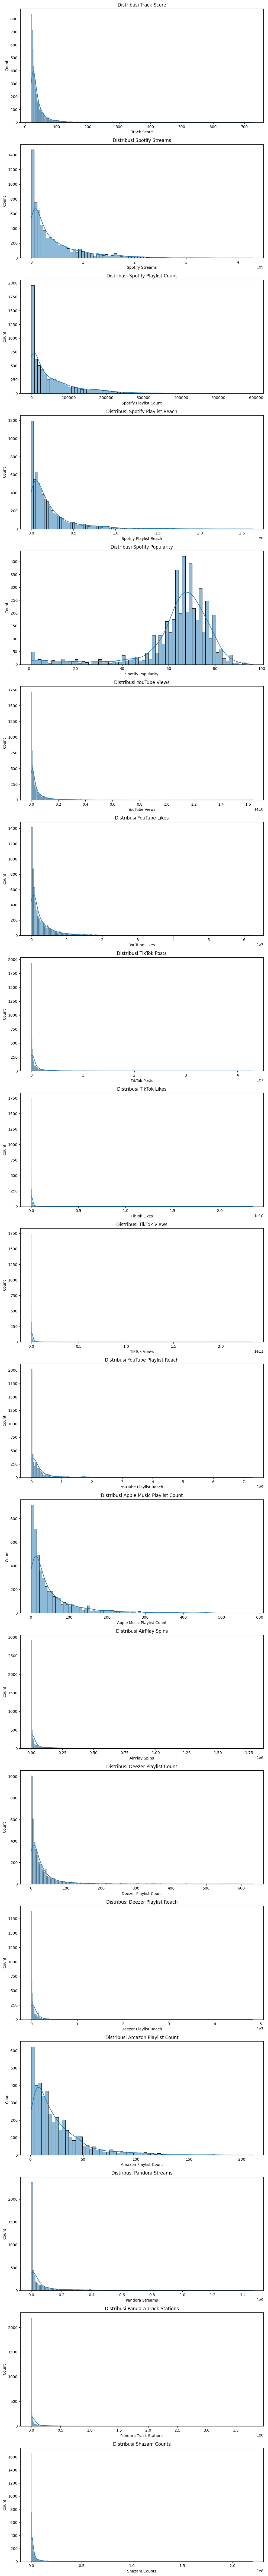

In [38]:
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(10, 5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

In [39]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [40]:
df[numeric_cols] += 1
df[numeric_cols] = np.log(df[numeric_cols])

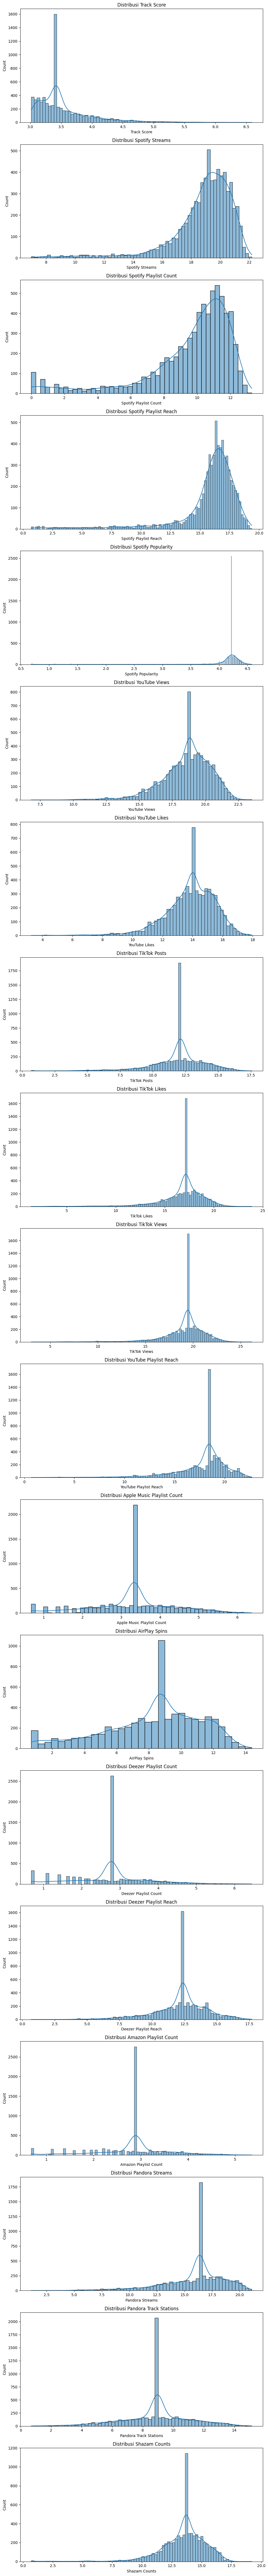

In [41]:
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(10, 5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 6872
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       6872 non-null   object        
 1   Album Name                  6872 non-null   object        
 2   Artist                      6865 non-null   object        
 3   Release Date                6872 non-null   datetime64[ns]
 4   ISRC                        6872 non-null   object        
 5   All Time Rank               6872 non-null   object        
 6   Track Score                 6872 non-null   float64       
 7   Spotify Streams             6872 non-null   float64       
 8   Spotify Playlist Count      6872 non-null   float64       
 9   Spotify Playlist Reach      6872 non-null   float64       
 10  Spotify Popularity          6872 non-null   float64       
 11  YouTube Views               6872 non-null   float64       
 1

In [43]:
df['All Time Rank'] = df['All Time Rank'].str.replace(',', '')
df['All Time Rank'] = df['All Time Rank'].astype(int)

In [44]:
cat_col = ['Track', 'Album Name', 'Artist','ISRC']
df[cat_col]

Track  \
0                                   MILLION DOLLAR BABY   
1                                           Not Like Us   
2                            i like the way you kiss me   
3                                               Flowers   
4                                               Houdini   
...                                                 ...   
6868  Lean On (feat. Mï¿½ï¿½ & DJ Snake) - J Balvin ...   
6869  Is It Over Now? (Taylor's Version) (From The V...   
6870                                                You   
6871                                        To the Bone   
6872                                         i love you   

                                             Album Name          Artist  \
0                          Million Dollar Baby - Single   Tommy Richman   
1                                           Not Like Us  Kendrick Lamar   
2                            I like the way you kiss me         Artemas   
3                                      Flowers - Single     Miley Cyrus   
4                                               Houdini          Eminem   
...                                                 ...             ...   
6868  Lean On (feat. Mï¿½ï¿½ & DJ Snake) [J Balvin &...     Major Lazer   
6869                            1989 (Taylor's Version)    Taylor Swift   
6870                                                You      Willy Paul   
6871                                        Flying Solo       Pamungkas   
6872           WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?   Billie Eilish   

              ISRC  
0     QM24S2402528  
1     USUG12400910  
2     QZJ842400387  
3     USSM12209777  
4     USUG12403398  
...            ...  
6868  FR6P11501180  
6869  USUG12306691  
6870  QZW9K2296922  
6871  FR2X41995983  
6872  USUM71900773  

[6872 rows x 4 columns]

In [45]:
df['Track'].value_counts()

Track
Danza Kuduro - Cover                18
Cake By The Ocean - Cover           14
ýýýýýý                              12
ýýýýýýýýýýýý                        11
Stay With Me                         7
                                    ..
Kalaastar (From "Honey 3.0")         1
Tshwala Bam (feat. S.N.E, EeQue)     1
Meridian                             1
LOU LOU                              1
Me Acostumbre (feat. Bad Bunny)      1
Name: count, Length: 4370, dtype: int64

In [46]:
df['Album Name'].value_counts()

Album Name
Un Verano Sin Ti                                    29
THE TORTURED POETS DEPARTMENT                       27
nadie sabe lo que va a pasar maï¿½ï¿                26
Full Circle: The Live Anthology                     24
Papercuts                                           20
                                                    ..
Broccoli (feat. Lil Yachty) - Single                 1
Saami Saami (From "Pushpa The Rise Part - 01")       1
Diego & Victor Hugo Ao Vivo Em Sï¿½ï¿½o Paulo Vo     1
Thoda Thoda Pyaar                                    1
Me Acostumbre (feat. Bad Bunny)                      1
Name: count, Length: 4005, dtype: int64

In [47]:
df['Artist'].value_counts()

Artist
Drake                   92
Bad Bunny               90
Taylor Swift            89
The Weeknd              52
KAROL G                 50
                        ..
Rahat Fateh Ali Khan     1
Maria Marï¿½ï            1
Kid Pharaoh              1
Darius Rucker            1
BUSHIDO ZHO              1
Name: count, Length: 1999, dtype: int64

In [48]:
df['ISRC'].value_counts()

ISRC
USUM72116311    6
DGA092216622    5
TCACS1630643    5
QMRSZ1901461    5
USUG12004193    5
               ..
QZDQH1906375    1
BRWMB2400738    1
USUG12101248    1
US2BU1600020    1
USB271700107    1
Name: count, Length: 4598, dtype: int64

In [49]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        7
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
dtype: int64

In [50]:
df.dropna(inplace=True)

<ipython-input-51-b142536b2a5d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette="viridis")
<ipython-input-51-b142536b2a5d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette="viridis")
<ipython-input-51-b142536b2a5d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette="viridis")
<ipython-input-51-b142536b2a5d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

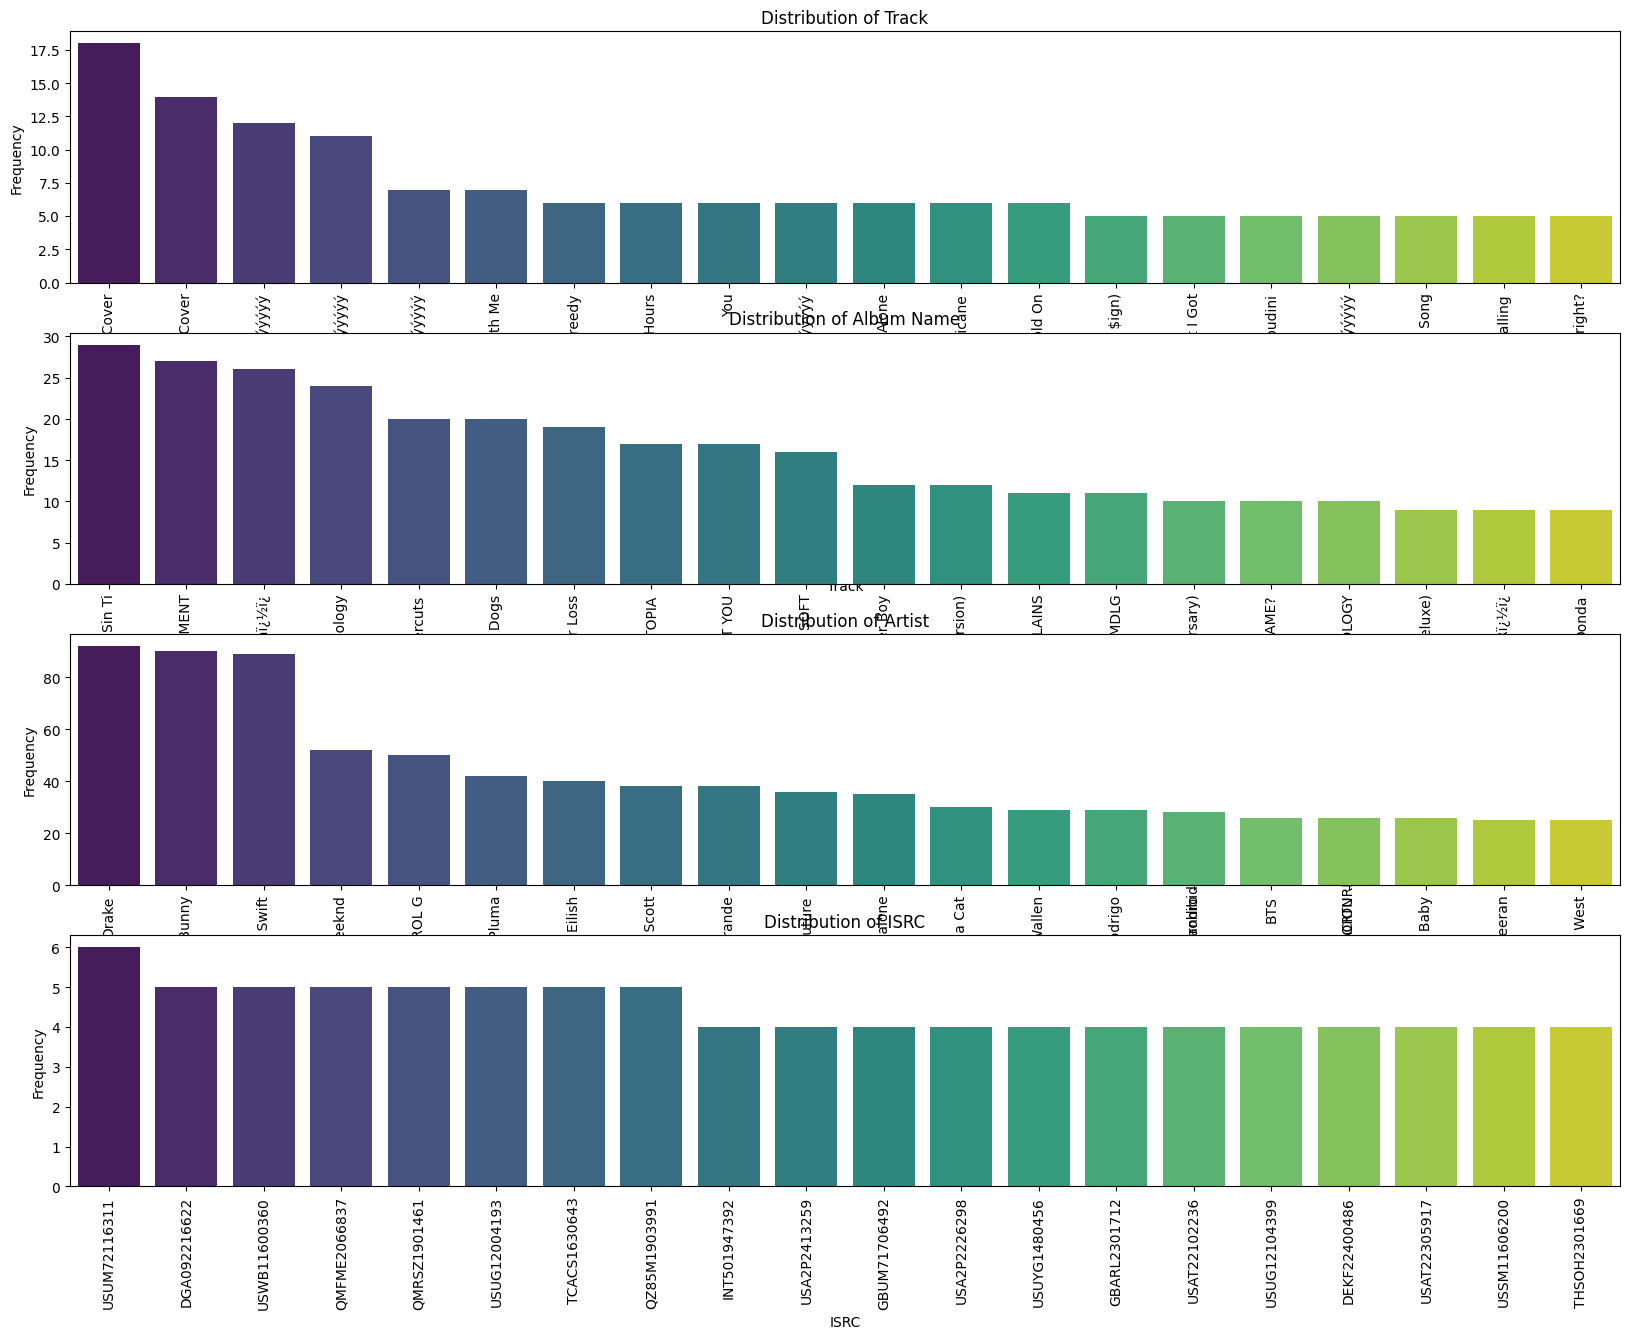

In [51]:
# Buat subplot
plt.figure(figsize=(20, 15))

# Loop melalui setiap kolom kategorikal
for i, col in enumerate(cat_col):
    plt.subplot(len(cat_col), 1, i + 1)

    # Hitung frekuensi nilai
    freq = df[col].value_counts().head(20)  # Menampilkan 20 nilai teratas

    # Buat plot bar
    sns.barplot(x=freq.index, y=freq.values, palette="viridis")

    # Tambahkan label dan judul
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6865 entries, 0 to 6872
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       6865 non-null   object        
 1   Album Name                  6865 non-null   object        
 2   Artist                      6865 non-null   object        
 3   Release Date                6865 non-null   datetime64[ns]
 4   ISRC                        6865 non-null   object        
 5   All Time Rank               6865 non-null   int64         
 6   Track Score                 6865 non-null   float64       
 7   Spotify Streams             6865 non-null   float64       
 8   Spotify Playlist Count      6865 non-null   float64       
 9   Spotify Playlist Reach      6865 non-null   float64       
 10  Spotify Popularity          6865 non-null   float64       
 11  YouTube Views               6865 non-null   float64       
 1

In [53]:
df['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
6868   2015-09-04
6869   2023-10-26
6870   2022-11-25
6871   2019-06-14
6872   2019-03-29
Name: Release Date, Length: 6865, dtype: datetime64[ns]

In [54]:
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day

# Hapus kolom 'Release Date' jika tidak diperlukan lagi
df.drop(columns=['Release Date'], inplace=True)

# Tampilkan beberapa baris pertama untuk memastikan perubahan
print(df.head())

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

           ISRC  All Time Rank  Track Score  Spotify Streams  \
0  QM24S2402528              1     6.588101        19.782864   
1  USUG12400910              2     6.304266        19.595340   
2  QZJ842400387              3     6.290457        20.214620   
3  USSM12209777              4     6.100095        21.431932   
4  USUG12403398              5     6.050441        18.488666   

   Spotify Playlist Count  Spotify Playlist Reach  Spotify Popularity  ...  \
0               10.332572               19.096842            4

In [55]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_col:
    df[col + '_encoded'] = le.fit_transform(df[col])

print(df)

                                                  Track  \
0                                   MILLION DOLLAR BABY   
1                                           Not Like Us   
2                            i like the way you kiss me   
3                                               Flowers   
4                                               Houdini   
...                                                 ...   
6868  Lean On (feat. Mï¿½ï¿½ & DJ Snake) - J Balvin ...   
6869  Is It Over Now? (Taylor's Version) (From The V...   
6870                                                You   
6871                                        To the Bone   
6872                                         i love you   

                                             Album Name          Artist  \
0                          Million Dollar Baby - Single   Tommy Richman   
1                                           Not Like Us  Kendrick Lamar   
2                            I like the way you kiss me         Ar

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6865 entries, 0 to 6872
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       6865 non-null   object 
 1   Album Name                  6865 non-null   object 
 2   Artist                      6865 non-null   object 
 3   ISRC                        6865 non-null   object 
 4   All Time Rank               6865 non-null   int64  
 5   Track Score                 6865 non-null   float64
 6   Spotify Streams             6865 non-null   float64
 7   Spotify Playlist Count      6865 non-null   float64
 8   Spotify Playlist Reach      6865 non-null   float64
 9   Spotify Popularity          6865 non-null   float64
 10  YouTube Views               6865 non-null   float64
 11  YouTube Likes               6865 non-null   float64
 12  TikTok Posts                6865 non-null   float64
 13  TikTok Likes                6865 non-n

In [57]:
del df['Track']
del df['Album Name']
del df['Artist']
del df['ISRC']

In [59]:
df.head()

All Time Rank  Track Score  Spotify Streams  Spotify Playlist Count  \
0              1     6.588101        19.782864               10.332572   
1              2     6.304266        19.595340               10.244023   
2              3     6.290457        20.214620               10.902869   
3              4     6.100095        21.431932               12.505447   
4              5     6.050441        18.488666                8.885164   

   Spotify Playlist Reach  Spotify Popularity  YouTube Views  YouTube Likes  \
0               19.096842            4.532599      18.249593      14.353831   
1               18.977992            4.532599      18.572088      15.064478   
2               19.170245            4.532599      18.624430      14.616943   
3               18.732341            4.219508      20.815025      16.179172   
4               18.835897            4.488636      18.164161      15.115754   

   TikTok Posts  TikTok Likes  ...  Pandora Track Stations  Shazam Counts  \
0     15.567784     20.294889  ...               10.040289      14.797313   
1     13.422025     17.377225  ...               10.255728      13.927302   
2     14.922554     19.432842  ...                8.637639      15.480448   
3     15.788176     20.799076  ...               12.222856      16.285553   
4      9.705098     17.135768  ...                8.854665      13.032478   

   Explicit Track  Year  Month  Day  Track_encoded  Album Name_encoded  \
0             0.0  2024      4   26           2188                2169   
1             1.0  2024      5    4           2554                2384   
2             0.0  2024      3   19           4224                1579   
3             0.0  2023      1   12           1277                1217   
4             1.0  2024      5   31           1602                1516   

   Artist_encoded  ISRC_encoded  
0            1754          1305  
1             953          3745  
2             136          1845  
3            1234          3372  
4             576          3790  

[5 rows x 28 columns]

In [58]:
ads

NameError: name 'ads' is not defined

In [ ]:
df

In [ ]:
df.to_csv('SPY_Clean.csv', index=False)

In [ ]:
df.shape

In [ ]:
del df['Track_encoded']


In [ ]:
del df['Album Name_encoded']


In [ ]:
del df['ISRC_encoded']

del innocent kolomm

In [ ]:
df.to_csv('SPY_Clean1.csv', index=False)

In [ ]:
asd

In [ ]:
# terlalu banyak type di Track dan Album

In [ ]:
del df['Track']
del df['Album Name']

In [ ]:
grouped_data = []
for col in cat_col:
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    grouped_data.append(counts)

# Concatenate the grouped data
combined_data = pd.concat(grouped_data, ignore_index=True)

# Create the multi-bar plot
sns.barplot(x=combined_data[cat_col[0]], y='count', hue=combined_data[cat_col[0]], data=combined_data)
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
asdadsds

In [ ]:
'''fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(10, 5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Apply logarithmic transformation before plotting
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], transform='log')
    axes[i].set_title(f'Distribusi {col} (Logarithmic)')
    axes[i].set_xlabel(col)  # Explicitly set x-axis label

plt.tight_layout()
plt.show()'''

In [ ]:
assda

In [ ]:
# Replace commas with empty strings and convert to numeric
df[numeric_cols] = df[numeric_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Remove commas and convert to numeric
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.str.replace(',', '').astype(float))

In [ ]:
asd

In [ ]:
# Ubah tipe data tanggal (sesuaikan format jika perlu)
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [ ]:
asd

In [ ]:
# Handle nilai null (contoh: ganti dengan rata-rata untuk kolom numerik)
df['Spotify Popularity'].fillna(df['Spotify Popularity'].mean(), inplace=True)

# Cek duplikasi data
print(df.duplicated().sum())

# ... (langkah cleaning lainnya, seperti standarisasi format, dll.)

# Simpan data yang sudah dibersihkan
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
'''# Handling missing values - Example strategy: filling with mean (you can change the strategy as needed)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Normalizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '')

# Display the cleaned DataFrame
print(df)

In [ ]:
# numerik = ['All Time Rank', 'Track Score', 'Track Score', ]

handle